In [3]:
# Your first requirement is to create a series of scatter plots to showcase the following relationships:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

# After each plot add a sentence or too explaining\data\2.5\forecast what the code is and analysing.

Example on how to make an API call using your API key
API call

http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={API key}

In [2]:
# Dependencies
import collections
# collections_abc = getattr(collections, 'Iterable', collections)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
from config import API
import json
from scipy.stats import linregress
import time
# # Configure gmaps
# gmaps.configure(api_key=gkey)

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [4]:

# Range of latitudes and longitudes
# while c < 644:
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# lat_lngs = np.hstack((lats,lngs))
# print(list(lat_lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# c= len(cities)



In [7]:
# Perform a weather check on each of the cities using a series of successive API calls.
#cities = ['yinchuan','airai','kushima']
# temp = []

# api_url = f"https://api.openweathermap.org/data/2.5/weather?q={cities}&appid={API}"
# for city in cities:
  
#   wea_data = requests.get(api_url).json() 
# #Get Temperature
# #   temp = wea_data["main"]["temp"]
#   temp.append(wea_data['main']['temp'])

# print(f"The temperature information for {cities} received is: {temp}")

In [5]:
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country = []
count = 0
set = 1
units ="standard"
api_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API}&units={units}"
print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    try:
        api_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API}&units={units}"
        response = requests.get(api_url + city).json()
        city_name.append(city)
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        if count > 48:
            count = 1
            set += 1
        else:
            count += 1
        print("Processing Record %s of Set %s | %s" %(count, set, city))
    except:
        print("City not found: Skipping...")
        city_name.pop()
        pass
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | kodiak
City not found: Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | kozhevnikovo
Processing Record 12 of Set 1 | warmbad
City not found: Skipping...
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | shingu
Processing Record 15 of Set 1 | solnechnyy
Processing Record 16 of Set 1 | cockburn town
Processing Record 17 of Set 1 | lavrentiya
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | mukhen
Processing Record 22 of Set 

In [9]:
# Draft-------failed code
# cities = ["Paris", "Sydney", "Oslo", "New York", "Tokyo"]
# units ="imperial"
# # set up lists to hold reponse info
# lat = []
# max_temp =[]
# windspeed =[]
# humid =[]
# cloud = []
# date = []
# country =[]

# # Loop through the list of cities and perform a request for data on each

# api_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API}&units={units}"
# for city in cities:
#     try:
        
#         #print(api_url)
#         response = requests.get(api_url + city).json()
        
#         lat.append(response['coord']['lat'])
#         max_temp.append(response['main']['temp_max'])
#         humid.append(response['main']['humidity'])
#         cloud.append(response['clouds']['all'])
#         windspeed.append(response['wind']['speed'])
#         country.append(response['sys']['country'])
#         date.append(response['dt'])

#     except KeyError:
#         lat.append(-999999)
#         max_temp.append(-111111)

# print(f"The latitude information information for {cities} received is: {lat}")
# print(f"The temperature information is: {max_temp}")
# print(f"The humidity is: {humid}")
# print(f"The country  received is: {country}")



In [6]:
# length of (lat, temp, windspeed, humid, cloud, date, country) 

len(city_name), len(lat), len(max_temp), len(wind_speed), len(humidity), len(cloudiness), len(country), len(date)


(586, 586, 586, 586, 586, 586, 586, 586)

In [11]:
# # Note: target url works!
# target_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats}&lon={lngs}&appid={API}"
# # Run a request to endpoint and convert result to json
# wea_data = requests.get(target_url).json()

# # Print the json
# wea_data

In [7]:
# create a data frame max_temp = []
# humidity 
# cloudiness
# wind_speed
# date
# country 
weather_dict = {"City": city_name,"Lat": lat,"Long":lon, "Temp":max_temp, "Cloudiness": cloudiness,"Humidity":humidity, "Wind Speed": wind_speed, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Long,Temp,Cloudiness,Humidity,Wind Speed,Date
0,barrow,71.2906,-156.7887,276.16,0,81,3.60,1655355750
1,new norfolk,-42.7826,147.0587,284.87,41,70,0.43,1655355751
2,kodiak,57.7900,-152.4072,283.24,12,83,1.81,1655355751
3,rikitea,-23.1203,-134.9692,295.91,85,66,4.16,1655355753
4,yellowknife,62.4560,-114.3525,288.46,100,82,4.47,1655355754
...,...,...,...,...,...,...,...,...
581,zalesovo,53.9939,84.7431,291.04,97,78,3.66,1655356079
582,port hedland,-20.3167,118.5667,303.18,37,20,6.17,1655356079
583,gomel,52.4345,30.9754,285.14,0,82,4.00,1655356080
584,bandar-e lengeh,26.5579,54.8807,307.11,9,47,3.78,1655356081


In [8]:
# weather_data.to_csv("C:\Users\mr-ma\Documents\GitHub\python-api-challenge\VacationPy")  
weather_data.to_csv("weatherdata")


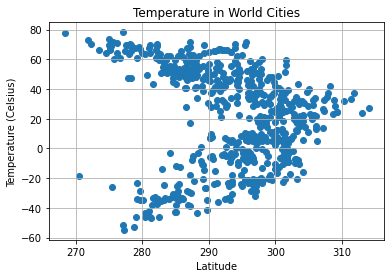

In [9]:
# Build a scatter plot for each data type
# plt.xlim( [ -90, 90 ] ) 
# plt.ylim( [-50 , 130 ] ) 
plt.scatter(weather_data["Temp"], weather_data["Lat"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

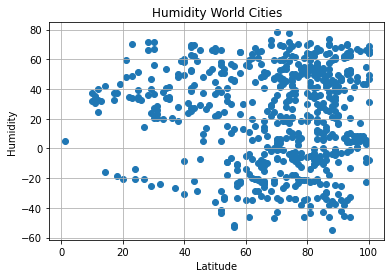

In [10]:
plt.scatter(weather_data["Humidity"], weather_data["Lat"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

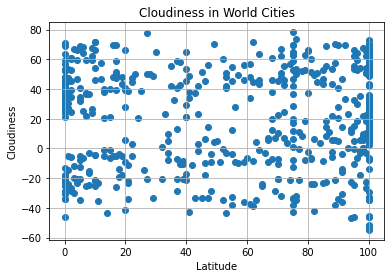

In [11]:
plt.scatter(weather_data["Cloudiness"], weather_data["Lat"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

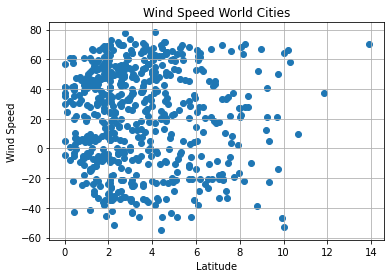

In [12]:
plt.scatter(weather_data["Wind Speed"], weather_data["Lat"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind SpeedInWorldCities.png")

# Show plot
plt.show()

In [ ]:
# Lets try requestion by name

# target2_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{state},{country}&limit={limit}&appid={API}"

# wea2_data = requests.get(target2_url).json()

# # Print the json
# wea2_data


In [14]:
North = weather_data[weather_data["Lat"] >= 0 ]
print(North)

                City      Lat      Long    Temp  Cloudiness  Humidity  \
0             barrow  71.2906 -156.7887  276.16           0        81   
2             kodiak  57.7900 -152.4072  283.24          12        83   
4        yellowknife  62.4560 -114.3525  288.46         100        82   
6       ponta do sol  32.6667  -17.1000  292.04          36        74   
10      kozhevnikovo  56.2589   83.9714  291.62          47        60   
..               ...      ...       ...     ...         ...       ...   
580      brownsville  25.9018  -97.4975  301.12         100        86   
581         zalesovo  53.9939   84.7431  291.04          97        78   
583            gomel  52.4345   30.9754  285.14           0        82   
584  bandar-e lengeh  26.5579   54.8807  307.11           9        47   
585          wanning  18.8003  110.3967  304.17          96        72   

     Wind Speed        Date  
0          3.60  1655355750  
2          1.81  1655355751  
4          4.47  1655355754  
6  

The r-squared is: 0.43583592298662965


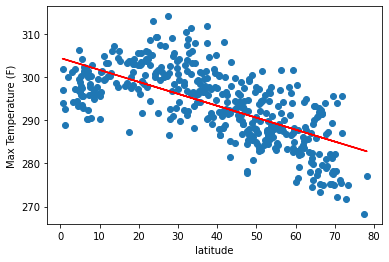

In [16]:
# Your second requirement is to run linear regression on each relationship, only this time separating them 
# into Northern Hemisphere (greater than or equal to 0 degrees latitude) 
# and Southern Hemisphere (less than 0 degrees latitude): 

# Northern Hemisphere (greater than or equal to 0 degrees latitude)
# # lets append a list of values and insert weather_data["lat"] > 0 or use a dataframe then graph it!


x_values = North['Lat']
y_values = North['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.xlim( [ 0, 90 ] ) 
# plt.ylim( [-50 , 500 ] )
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.43135371437765574


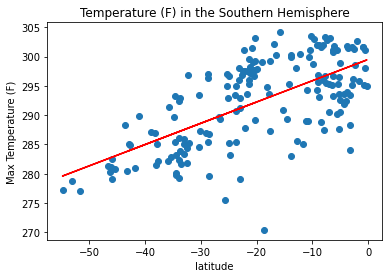

In [18]:
# Southern Hemisphere (less than 0 degrees latitude)
# # lets append a list of values and insert weather_data["lat"] < 0 or use a dataframe then graph it!
south =  weather_data[weather_data["Lat"] < 0 ]

x_values = south['Lat']
y_values = south['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.xlim( [ -90, 0 ] ) 
# plt.ylim( [-50 , 130 ] )
plt.title("Temperature (F) in the Southern Hemisphere")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()



The r-squared is: 0.001728845049849828


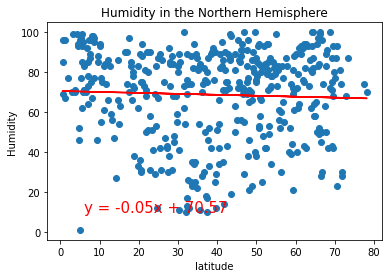

In [19]:
#Latitude vs. Humidity -----North
x_values = North['Lat']
y_values = North['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.xlim( [ 0, 90 ] ) 
# plt.ylim( [-50 , 130 ] )
plt.title("Humidity in the Northern Hemisphere")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()




The r-squared is: 0.003027192585332051


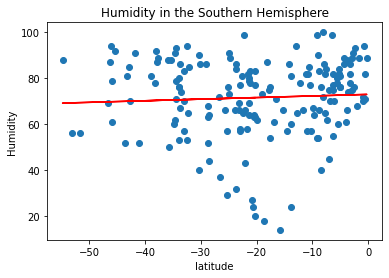

In [20]:
#Latitude vs. Humidity -----South
x_values = south['Lat']
y_values = south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.xlim( [ 0, 90 ] ) 
# plt.ylim( [-50 , 130 ] )
plt.title("Humidity in the Southern Hemisphere")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.006500298584880721


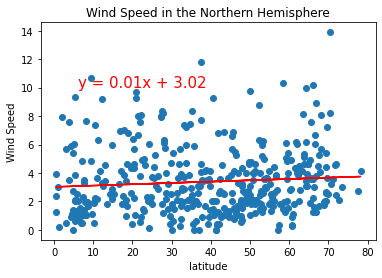

In [21]:
x_values = North['Lat']
y_values = North['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.xlim( [ 0, 90 ] ) 
# plt.ylim( [-50 , 130 ] )
plt.title("Wind Speed in the Northern Hemisphere")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0288321841351845


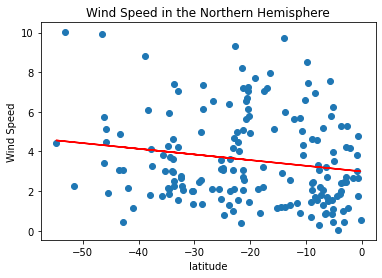

In [22]:
x_values = south['Lat']
y_values = south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.xlim( [ 0, 90 ] ) 
# plt.ylim( [-50 , 130 ] )
plt.title("Wind Speed in the Northern Hemisphere")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.01664331424670473


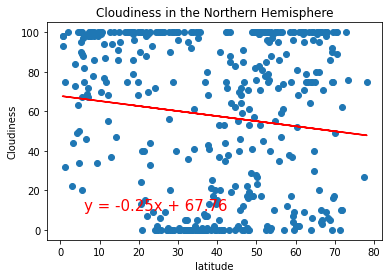

In [23]:
x_values = North['Lat']
y_values = North['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.xlim( [ 0, 90 ] ) 
# plt.ylim( [-50 , 130 ] )
plt.title("Cloudiness in the Northern Hemisphere")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.02006110434182607


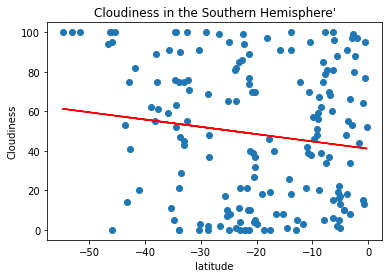

In [24]:
x_values = south['Lat']
y_values = south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.xlim( [ 0, 90 ] ) 
# plt.ylim( [-50 , 130 ] )
plt.title("Cloudiness in the Southern Hemisphere'")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()